# Importation des librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
%matplotlib inline


APPLY_GRIDSEARCH = True
DATA_PATH="data/"
FILTER_DIRECTION = False


print(sorted(os.listdir(DATA_PATH)))

['._DP980Y700_SDG3_2021.csv', '._DP980Y700_SDG3_2021_extended.csv', 'DP980GA_Galma1_upgrade.csv', 'DP980Y700_EKO1_upgrade.csv', 'DP980Y700_SDG3_2021.csv', 'DP980Y700_SDG3_2021_extended.csv', 'DP980Y700_SDG3_2021_upgrade.csv', 'DP980_Sagunto_2021_upgrade.csv']


# Chargement des données
Utilisation d'une dataframe panda

In [3]:
df1 = pd.read_csv(DATA_PATH + 'DP980Y700_SDG3_2021_upgrade.csv', delimiter =";", decimal=",")
df2 = pd.read_csv(DATA_PATH + 'DP980GA_Galma1_upgrade.csv', delimiter =";", decimal=",")
df3 = pd.read_csv(DATA_PATH + 'DP980Y700_EKO1_upgrade.csv', delimiter =";", decimal=",")
df4 = pd.read_csv(DATA_PATH + 'DP980_Sagunto_2021_upgrade.csv', delimiter =";", decimal=",")


frames = [df1, df2, df3, df4]

df = pd.concat(frames, ignore_index=True)
df = df.fillna(0) # replace NaN by 0

# Description des données

In [4]:
df.head()

,Coilnr,Date,Direction,Type eprouvette,Th mm,Re02 Mpa,Rm Mpa,A80 x10%,C ppm,Mn ppm,...,B ppm,Mo ppm,Linespeed (m/min),SKP elongation (%),Heating C/s 660 to 750,t_soaking_hot s,Cooling C/s,t_soaking_cold s,soaking_hot C,soaking_cold C
0,41971853,44202,L,I20,1.92,791.0,1058.0,107.0,813.0,25430,...,19.0,959.0,51.922714,0.395166,1.373933,101.689599,-13.559891,57.778181,798.669830,487.601574
1,41943566,44204,L,I20,1.01,690.0,1029.0,114.0,713.0,25290,...,18.0,942.0,130.468628,0.453954,3.771506,40.469499,-33.617532,22.994033,804.154785,497.245289
2,42071675,44205,L,I20,1.62,796.0,1037.0,106.0,758.0,25530,...,20.0,967.0,78.013863,0.394861,2.374375,67.680279,-21.721390,38.454704,813.640350,484.193967
3,42071668,44205,L,I20,1.62,745.0,1036.0,105.0,758.0,25530,...,20.0,967.0,76.819946,0.394584,2.412430,68.732149,-21.563130,39.052357,814.985870,481.330018
4,42071705,44206,L,I20,1.92,776.0,1006.0,95.0,735.0,25686,...,19.0,959.0,63.891125,0.452333,2.008020,82.640586,-16.760875,46.954879,807.002014,481.701958


In [5]:
df.describe()

,Coilnr,Th mm,Re02 Mpa,Rm Mpa,A80 x10%,C ppm,Mn ppm,Si ppm,P ppm,S ppm,...,B ppm,Mo ppm,Linespeed (m/min),SKP elongation (%),Heating C/s 660 to 750,t_soaking_hot s,Cooling C/s,t_soaking_cold s,soaking_hot C,soaking_cold C
count,1.996000e+03,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,...,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000
mean,2.952998e+07,1.373724,707.456612,1017.140296,111.176854,732.923444,25127.706413,2564.928694,122.451880,14.443933,...,19.562321,933.649262,88.773042,0.205413,3.718466,70.993123,-29.456271,38.014392,802.961173,469.865110
std,3.388363e+07,0.308761,54.269892,26.523060,19.632942,25.144506,337.344519,127.159362,15.246136,8.415148,...,1.663071,51.696319,25.160890,0.141161,1.600903,29.172312,9.897381,13.084105,16.787222,11.139825
min,2.000010e+05,0.800000,465.000000,819.333333,34.200000,675.000000,24326.000000,2290.000000,85.000000,0.000000,...,16.000000,790.000000,40.851750,0.022126,1.373933,7.228916,-52.125338,19.518072,735.250000,398.020000
25%,2.137158e+05,1.160000,675.554625,999.000000,98.200000,716.000000,24850.000000,2489.000000,113.000000,7.000000,...,18.990000,908.000000,72.059122,0.090856,2.402294,51.893461,-36.263060,28.285471,803.399959,462.966325
50%,5.243560e+05,1.370000,704.000000,1017.000000,109.500000,729.000000,25086.000000,2560.000000,121.000000,15.000000,...,19.000000,939.000000,89.408657,0.120000,3.506820,62.977811,-27.933792,33.704032,808.926773,467.229265
75%,4.700677e+07,1.600000,741.125000,1034.000000,120.925000,750.000000,25340.000000,2624.000000,130.000000,20.000000,...,21.000000,968.250000,110.383412,0.393317,4.658361,81.578940,-21.584996,43.197805,811.428798,479.077892
max,9.265894e+07,2.040000,851.000000,1112.400000,191.000000,821.000000,26220.000000,3230.000000,178.990000,40.000000,...,33.666667,1136.000000,147.113602,0.520000,18.697776,157.317073,-11.168831,77.707317,851.462820,515.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1996 entries, 0 to 1995
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Coilnr                  1996 non-null   int64  
 1   Date                    1996 non-null   object 
 2   Direction               1996 non-null   object 
 3   Type eprouvette         1996 non-null   object 
 4   Th mm                   1996 non-null   float64
 5   Re02 Mpa                1996 non-null   float64
 6   Rm Mpa                  1996 non-null   float64
 7   A80 x10%                1996 non-null   float64
 8   C ppm                   1996 non-null   float64
 9   Mn ppm                  1996 non-null   int64  
 10  Si ppm                  1996 non-null   float64
 11  P ppm                   1996 non-null   float64
 12  S ppm                   1996 non-null   float64
 13  Al ppm                  1996 non-null   float64
 14  Ti ppm                  1996 non-null   

# Separation du dataset en train-set et test-set

In [4]:
# Integrer deux nouveaux fichiers, essayer sans prendre la vitesse de ligne, sans le sens transverse... Montrer les mêmes graphs
# Penser aussi à retirer coilnumber
# Optimiser les réseaux de neurones

# Ajouter les deux lignes + relancer tous les entrainements
# Faire un tableau qui resume les résultats en fonction des algos et features
# Ajouter d'autres modeles de ML + viz des features importances
# Faire du wrapper ou filtre multivarié par lignes
# Faire un script de moyennes


# Application des filtres
filters = df[["Date", "Direction", "Type eprouvette", "Coilnr"]]

if FILTER_DIRECTION:
    df = df[ df.Direction == 'L']

target_re02 = df[["Re02 Mpa"]]
target_rm = df[["Rm Mpa"]]
target_A = df[["A80 x10%"]]

features = df.drop(target_A + target_re02 + target_rm + filters ,axis=1)



In [5]:
len(np.where(df.Direction == 'T')[0])

305

In [6]:
from sklearn.model_selection import train_test_split

# Séparation du dataset en train et test
X_train,X_test,Y_train_rm,Y_test_rm = train_test_split(features,target_rm,test_size=0.20,random_state=0)
Y_train_rm = Y_train_rm.values.ravel()
Y_test_rm = Y_test_rm.values.ravel()

X_train_re02,X_test_re02,Y_train_re02,Y_test_re02 = train_test_split(features,target_re02,test_size=0.20,random_state=0)
Y_train_re02 = Y_train_re02.values.ravel()
Y_test_re02 = Y_test_re02.values.ravel()

X_train_A,X_test_A,Y_train_A,Y_test_A = train_test_split(features,target_A,test_size=0.20,random_state=0)
Y_train_A = Y_train_A.values.ravel()
Y_test_A = Y_test_A.values.ravel()

print(X_train.shape, X_test.shape, Y_train_rm.shape, Y_test_rm.shape)

(1596, 20) (400, 20) (1596,) (400,)


In [7]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

print(X_train)
print(X_test)

[[ 2.04022172  1.58134869 -0.17210695 ...  2.38248241 -2.9697179
  -1.04812192]
 [ 1.78040848  1.06348676  2.98645478 ...  1.41917225 -0.10958283
   1.6600218 ]
 [ 1.39068862 -0.76894775 -0.58242479 ...  0.33420557  0.41374316
  -0.39367705]
 ...
 [-0.98010719 -0.13157923 -0.79201159 ... -0.71339948  0.16467867
  -0.76488506]
 [-0.52543402 -0.13157923  0.09356646 ... -0.64880352  0.81043715
   1.76042154]
 [ 0.74115552 -0.25108583 -0.23114549 ...  1.95903748 -2.44840573
  -0.68981649]]
[[-0.00580754  0.5057893   1.15626013 ... -0.41391205  0.72371664
   1.96107747]
 [-0.00580754 -0.92828989 -0.57356901 ... -0.43051309  0.38911875
  -0.17695869]
 [ 2.04022172  0.34644717  1.51049135 ...  2.500106   -2.3441433
  -1.13769828]
 ...
 [ 1.39068862 -0.60960562 -0.84219435 ...  0.36208435  0.30826919
  -0.38525687]
 [-0.55791068 -1.08803037  0.09356646 ...  1.8635548  -2.01646136
  -0.33151106]
 [-0.00580754 -1.00796095  0.53635549 ... -0.44962372  0.78504609
   2.00399847]]


# Modele de Régression

## Importation des métriques

In [8]:
from sklearn.metrics import r2_score, mean_squared_error

## Nu SVR

### Prédiction de la résistance mécanique $R_m$

In [9]:
from sklearn.svm import NuSVR
from sklearn.model_selection import GridSearchCV

nu_svr_r = NuSVR(kernel='rbf')



if APPLY_GRIDSEARCH:
    param_grid = { 
                "C" : np.arange(0.7, 1., 0.05),
                'nu': np.arange(0.6, 1., 0.05),
                'gamma': np.arange(0.03, 0.05, 0.002),
                }

    nu_svr_r_cv = GridSearchCV(nu_svr_r, param_grid=param_grid, n_jobs=-1, cv=5, verbose=2)
    nu_svr_r_cv.fit(X_train, Y_train_rm)
    print(nu_svr_r_cv.best_estimator_, nu_svr_r_cv.best_params_, nu_svr_r_cv.best_score_)
    
    nu_svr_r = nu_svr_r_cv.best_estimator_
    
else:
    nu_svr_r = NuSVR(
                                C = 0.95,
                                gamma = 0.012,
                                kernel = 'rbf',
                                nu = 0.9)

nu_svr_r.fit(X_train, Y_train_rm)
print(nu_svr_r.score(X_train, Y_train_rm))
print(nu_svr_r.score(X_test, Y_test_rm))


Y_pred_rfr = nu_svr_r.predict(X_test)
print(Y_pred_rfr.shape)
print(Y_test_rm.shape)

r2_rm   = r2_score(Y_test_rm, Y_pred_rfr)
mse_rm  = mean_squared_error(Y_test_rm, Y_pred_rfr)
rmse_rm = mse_rm**(.5)


print("R2_score : ", r2_rm)
print("MSE : ", mse_rm)
print("RMSE : ", rmse_rm)


Fitting 5 folds for each of 5544 candidates, totalling 27720 fits
[CV] END .............................C=0.7, gamma=1, nu=0.6; total time=   0.1s
[CV] END .............................C=0.7, gamma=1, nu=0.6; total time=   0.1s
[CV] END .............................C=0.7, gamma=1, nu=0.6; total time=   0.1s
[CV] END .............................C=0.7, gamma=1, nu=0.6; total time=   0.2s
[CV] END ............................C=0.7, gamma=1, nu=0.65; total time=   0.1s
[CV] END .............................C=0.7, gamma=1, nu=0.6; total time=   0.2s
[CV] END ............................C=0.7, gamma=1, nu=0.65; total time=   0.1s
[CV] END ............................C=0.7, gamma=1, nu=0.65; total time=   0.1s
[CV] END ............................C=0.7, gamma=1, nu=0.65; total time=   0.1s
[CV] END ............................C=0.7, gamma=1, nu=0.65; total time=   0.1s
[CV] END ..............C=0.7, gamma=1, nu=0.7000000000000001; total time=   0.2s
[CV] END ..............C=0.7, gamma=1, nu=0

In [10]:
if APPLY_GRIDSEARCH:
    print(nu_svr_r_cv.best_estimator_, nu_svr_r_cv.best_params_, nu_svr_r_cv.best_score_)

NuSVR(C=1.0000000000000002, gamma=1, nu=0.9500000000000003) {'C': 1.0000000000000002, 'gamma': 1, 'nu': 0.9500000000000003} 0.0596672449626787


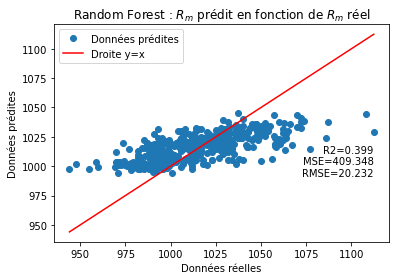

In [25]:
plt.title("Random Forest : $R_{m}$ prédit en fonction de $R_{m}$ réel")
plt.plot( Y_test_rm, Y_pred_rfr, 'o', label = "Données prédites")
plt.plot([min(Y_test_rm),max(Y_test_rm)], [min(Y_test_rm),max(Y_test_rm)], 'r', label = "Droite y=x")
plt.legend()
plt.xlabel("Données réelles")
plt.ylabel("Données prédites")
plt.text(x= max(Y_test_rm), y = min(Y_pred_rfr) + 20, s="R2=" + str(round(r2_rm,3)), horizontalalignment='right',
     verticalalignment='center')
plt.text(x= max(Y_test_rm), y = min(Y_pred_rfr) + 10, s="MSE=" + str(round(mse_rm,3)), horizontalalignment='right',
     verticalalignment='center')
plt.text(x= max(Y_test_rm), y = min(Y_pred_rfr), s="RMSE=" + str(round(rmse_rm,3)), horizontalalignment='right',
     verticalalignment='center')
plt.show()

### Prédiction de la résistance élastique à 0.2% $R_{e0.2}$

In [15]:
from sklearn.svm import NuSVR
from sklearn.model_selection import GridSearchCV

nu_svr_re02 = NuSVR(kernel='rbf')


if APPLY_GRIDSEARCH:
    param_grid = { 
                "C" : np.arange(0.5, 1., 0.02),
                'nu': np.arange(0.5, 1., 0.02),
                'gamma': np.arange(0.003, 0.018, 0.002),
                }

    nu_svr_re02_cv = GridSearchCV(nu_svr_re02, param_grid=param_grid, n_jobs=-1, cv=5, verbose=2)
    nu_svr_re02_cv.fit(X_train, Y_train_rm)
    print(nu_svr_re02_cv.best_estimator_, nu_svr_re02_cv.best_params_, nu_svr_re02_cv.best_score_)
    
    nu_svr_re02 = nu_svr_re02_cv.best_estimator_
    
else:
    nu_svr_re02 = NuSVR(
                                C = 0.95,
                                gamma = 0.012,
                                kernel = 'rbf',
                                nu = 0.9)



nu_svr_re02.fit(X_train_re02, Y_train_re02)
print(nu_svr_re02.score(X_train_re02, Y_train_re02))
print(nu_svr_re02.score(X_test_re02, Y_test_re02))

Y_pred_rfr_re02 = nu_svr_re02.predict(X_test_re02)
print(Y_pred_rfr_re02.shape)
print(Y_test_re02.shape)

r2_re02   = r2_score(Y_test_re02, Y_pred_rfr_re02)
mse_re02  = mean_squared_error(Y_test_re02, Y_pred_rfr_re02)
rmse_re02 = mse_re02**(.5)

print("R2_score : ", r2_re02)
print("MSE : ", mse_re02)
print("RMSE : ", rmse_re02)

Fitting 5 folds for each of 5000 candidates, totalling 25000 fits
[CV] END .........................C=0.5, gamma=0.003, nu=0.5; total time=   0.1s
[CV] END .........................C=0.5, gamma=0.003, nu=0.5; total time=   0.1s
[CV] END .........................C=0.5, gamma=0.003, nu=0.5; total time=   0.1s
[CV] END .........................C=0.5, gamma=0.003, nu=0.5; total time=   0.1s
[CV] END .........................C=0.5, gamma=0.003, nu=0.5; total time=   0.1s
[CV] END ........................C=0.5, gamma=0.003, nu=0.52; total time=   0.1s
[CV] END ........................C=0.5, gamma=0.003, nu=0.52; total time=   0.1s
[CV] END ........................C=0.5, gamma=0.003, nu=0.52; total time=   0.1s
[CV] END ........................C=0.5, gamma=0.003, nu=0.52; total time=   0.2s[CV] END ........................C=0.5, gamma=0.003, nu=0.54; total time=   0.1s

[CV] END ........................C=0.5, gamma=0.003, nu=0.52; total time=   0.1s
[CV] END ........................C=0.5, gam

KeyboardInterrupt: 

In [ ]:
if APPLY_GRIDSEARCH:
    print(nu_svr_re02_cv.best_estimator_, nu_svr_re02_cv.best_params_, nu_svr_re02_cv.best_score_)

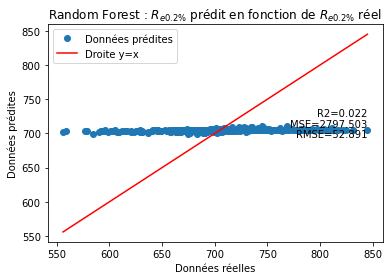

In [ ]:
plt.title("Random Forest : $R_{e0.2\%}$ prédit en fonction de $R_{e0.2\%}$ réel")
plt.plot(Y_test_re02, Y_pred_rfr_re02, 'o', label = "Données prédites")
plt.xlabel("Données réelles")
plt.ylabel("Données prédites")
plt.plot([min(Y_test_re02),max(Y_test_re02)], [min(Y_test_re02),max(Y_test_re02)], 'r', label = "Droite y=x")
plt.text(x= max(Y_test_re02), y = min(Y_pred_rfr_re02) + 30, s="R2=" + str(round(r2_re02,3)), horizontalalignment='right',
     verticalalignment='center')
plt.text(x= max(Y_test_re02), y = min(Y_pred_rfr_re02) + 15, s="MSE=" + str(round(mse_re02,3)), horizontalalignment='right',
     verticalalignment='center')
plt.text(x= max(Y_test_re02), y = min(Y_pred_rfr_re02), s="RMSE=" + str(round(rmse_re02,3)), horizontalalignment='right',
     verticalalignment='center')
plt.legend()
plt.show()

### Prédiction de l'allongement à la rupture $A_\%$

In [ ]:
from sklearn.svm import NuSVR
from sklearn.model_selection import GridSearchCV

nu_svr_A = NuSVR(kernel='rbf')


if APPLY_GRIDSEARCH:
    param_grid = { 
                "C" : np.arange(0.5, 1., 0.02),
                'nu': np.arange(0.5, 1., 0.02),
                'gamma': np.arange(0.003, 0.018, 0.002),
                }

    nu_svr_A_cv = GridSearchCV(nu_svr_A, param_grid=param_grid, n_jobs=-1, cv=5, verbose=2)
    nu_svr_A_cv.fit(X_train, Y_train_rm)
    print(nu_svr_A_cv.best_estimator_, nu_svr_A_cv.best_params_, nu_svr_A_cv.best_score_)
    
    nu_svr_A_cv = nu_svr_A_cv.best_estimator_
    
else:
    nu_svr_A = NuSVR(
                                C = 0.95,
                                gamma = 0.012,
                                kernel = 'rbf',
                                nu = 0.9)



nu_svr_A.fit(X_train_A, Y_train_A)
print(nu_svr_A.score(X_train_A, Y_train_A))
print(nu_svr_A.score(X_test_A, Y_test_A))

Y_pred_rfr_A = nu_svr_A.predict(X_test_A)
print(Y_pred_rfr_A.shape)
print(Y_test_A.shape)


r2_A   = r2_score(Y_test_A, Y_pred_rfr_A)
mse_A  = mean_squared_error(Y_test_A, Y_pred_rfr_A)
rmse_A = mse_A**(.5)

print("R2_score : ", r2_A)
print("MSE : ", mse_A)
print("RMSE : ", rmse_A)

0.10520818644581842
0.03916368054234953
(400,)
(400,)
R2_score :  0.03916368054234953
MSE :  329.0527525759439
RMSE :  18.139811260758584


In [ ]:
if APPLY_GRIDSEARCH:
    print(nu_svr_A_cv.best_estimator_, nu_svr_A_cv.best_params_, nu_svr_A_cv.best_score_)

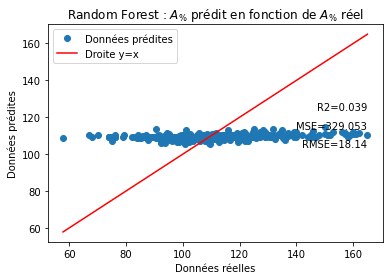

In [ ]:
plt.title("Random Forest : $A_{\%}$ prédit en fonction de $A_{\%}$ réel")
plt.plot( Y_test_A, Y_pred_rfr_A, 'o',label = "Données prédites")
plt.xlabel("Données réelles")
plt.ylabel("Données prédites")
plt.plot([min(Y_test_A),max(Y_test_A)], [min(Y_test_A),max(Y_test_A)], 'r', label = "Droite y=x")
plt.text(x= max(Y_test_A), y = min(Y_pred_rfr_A) + 20, s="R2=" + str(round(r2_A,3)), horizontalalignment='right',
     verticalalignment='center')
plt.text(x= max(Y_test_A), y = min(Y_pred_rfr_A) + 10, s="MSE=" + str(round(mse_A,3)), horizontalalignment='right',
     verticalalignment='center')
plt.text(x= max(Y_test_A), y = min(Y_pred_rfr_A), s="RMSE=" + str(round(rmse_A,3)), horizontalalignment='right',
     verticalalignment='center')
plt.legend()
plt.show()

# Enregistrement des modèles

In [ ]:
import pickle

modele_path = "./modeles/"

# now you can save it to a file
with open(modele_path + 'random_forest_re02_3_upgrade.pkl', 'wb') as f:
    pickle.dump(nu_svr_re02, f)

with open(modele_path + 'random_forest_rm_3_upgrade.pkl', 'wb') as f:
    pickle.dump(nu_svr_r, f)
    
with open(modele_path + 'random_forest_A_3_upgrade.pkl', 'wb') as f:
    pickle.dump(nu_svr_A, f)  


# Chargement des modèles

In [ ]:
import pickle
modele_path = "./modeles/"

with open(modele_path + 'random_forest_rm_3_upgrade.pkl', 'rb') as f:
    clf_rm = pickle.load(f)
print("-------------------------")
print("Résistance mécanique Rm")
print("-------------------------")
print("Train: ",clf_rm.score(X_train, Y_train_rm))
print("Test: ", clf_rm.score(X_test, Y_test_rm))

with open(modele_path + 'random_forest_re02_3_upgrade.pkl', 'rb') as f:
    clf_re02 = pickle.load(f)
    
print("-------------------------")
print("Résistance élastique Re02")
print("-------------------------")
print("Train: ", clf_re02.score(X_train_re02, Y_train_re02))
print("Test: ", clf_re02.score(X_test_re02, Y_test_re02))

with open(modele_path + 'random_forest_A_3_upgrade.pkl', 'rb') as f:
    clf_A = pickle.load(f)
print("-------------------------")
print("Allongement à la rupture A%")
print("-------------------------")
print("Train: ",clf_A.score(X_train_A, Y_train_A))
print("Test: ", clf_A.score(X_test_A, Y_test_A))


-------------------------
Résistance mécanique Rm
-------------------------
Train:  0.3063475445720655
Test:  0.34072771175669825
-------------------------
Résistance élastique Re02
-------------------------
Train:  0.04774137653279609
Test:  0.021591156489670915
-------------------------
Allongement à la rupture A%
-------------------------
Train:  0.10520818644581842
Test:  0.03916368054234953
